# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/omarrizkallah/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


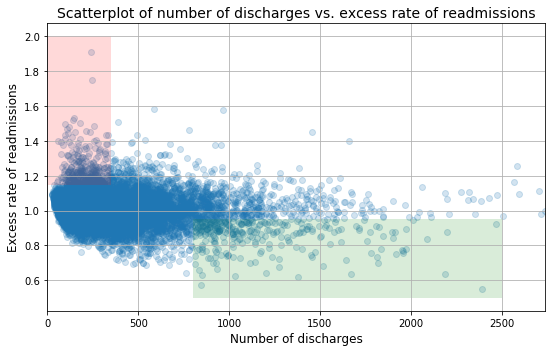

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
clean_hospital_read_df.head()

In [33]:
# Furst we notice that there are 81 Hospitals without any discharges. These hospitals should not be considered as they are 
# materially inactive. 

clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0 ]
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Readmissions/Discharge Ratio
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,0.480000
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,0.444444
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,0.428571
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013,0.379310
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013,0.433333


In [ ]:
clean_hospital_read_df['Readmissions/Discharge Ratio'] = clean_hospital_read_df['Number of Readmissions']/ clean_hospital_read_df['Number of Discharges']
clean_hospital_read_df['Predicted Readmission Rate'] / clean_hospital_read_df['Readmissions/Discharge Ratio'] 


In [ ]:
## This was done to explore exactly what the relationship between the predicted readmission rate and the actual calculated
## reamdissions/discharges rate it. As shown by the variation of the proportionality between the two values between
## 50 and 100, prediction is based on factors beyond this calculated value, such as the type of patients and perhaps
## characteristics of the hopsital. While we dont have any information within this dataset as to how they arrived
## at these values, it could be useful to understand how the predicted and expected values are calculated to see if
## there's any bias in it towards particular hospital sizes. 

## Checking Aforementioned Statistics and Hypothesis: 



In [46]:
df_less_100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100)]

percentage=round((float(len(df_less_100[(df_less_100["Excess Readmission Ratio"]>1)]))/len(df_less_100))*100,2)

print('The mean of excess readmission rate is :', '%.3f' %df_less_100["Excess Readmission Ratio"].mean()," and the excess readmission rate is: ",percentage, '%')

The mean of excess readmission rate is : 1.023  and the excess readmission rate is:  63.22 %


In [47]:
df_more_1000 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]

percentage=round((float(len(df_more_1000[(df_more_1000["Excess Readmission Ratio"]>1)]))/len(df_more_1000))*100,2)

print('The mean of excess readmission rate is :', '%.3f' %df_more_1000["Excess Readmission Ratio"].mean()," and the excess readmission rate is: ",percentage, '%')

The mean of excess readmission rate is : 0.978  and the excess readmission rate is:  44.49 %


In [48]:
import scipy.stats as st

two_sample = st.ttest_ind(df_more_1000['Excess Readmission Ratio'], 
                          df_less_100['Excess Readmission Ratio'])
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The t-statistic is -10.061 and the p-value is 0.00000000.


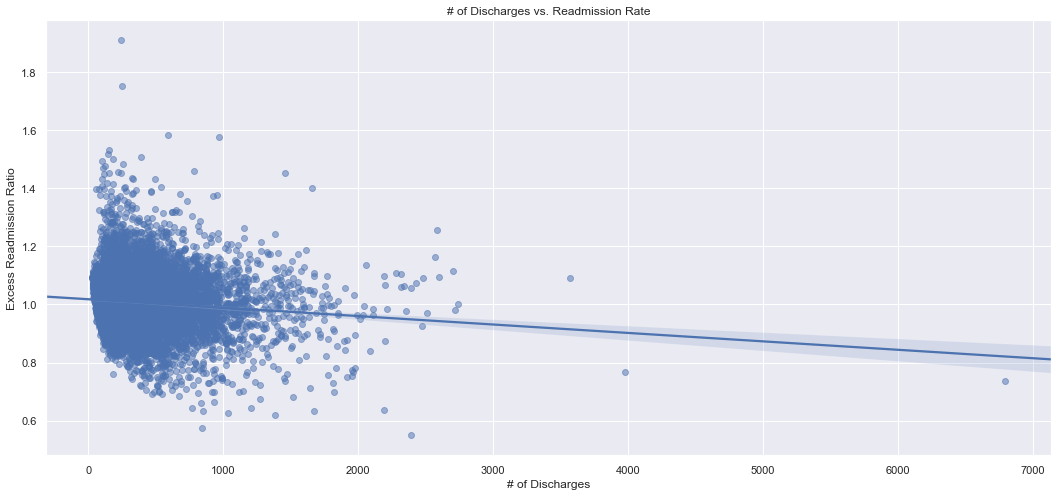

In [68]:
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)})

ax = sns.regplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df, scatter_kws={'alpha':0.5})

plt.xlabel('# of Discharges', fontsize=12)
plt.ylabel('Excess Readmission Ratio', fontsize=12)
ax.set_title('# of Discharges vs. Readmission Rate');

In [92]:
sm = st.trim_mean(df_less_100['Excess Readmission Ratio'], 0.05)
lg = st.trim_mean(df_more_1000['Excess Readmission Ratio'], 0.05)

diff = sm - lg

print('Trimmed Means\nSmall Hospitals: {:0.5}\nLarge Hospitals: {:0.5}\n\nDifference: {:0.5}'.format(sm, lg, diff))

Trimmed Means
Small Hospitals: 1.0194
Large Hospitals: 0.98069

Difference: 0.038691


## First we tested the existing hypothesis which was proven to be statistically significant. However, after trimming the mean by a proportion of 0.05, the results are within 4% of each other, and 2% on each side of the 1 threshold. These results are within such proximity that it might not be justifiable to focus extensively on the upgrading of smaller facilities. 

In [57]:
# Making a new dataframe with state variables 

df = clean_hospital_read_df.loc[:,['Excess Readmission Ratio', 'State']]
df = df.groupby('State').mean().reset_index()
df = df.sort_values('Excess Readmission Ratio')
df.head()

,State,Excess Readmission Ratio
41,SD,0.909824
26,MT,0.910461
13,ID,0.918378
28,ND,0.919466
29,NE,0.931769


In [58]:
df.tail()

,State,Excess Readmission Ratio
17,KY,1.047303
34,NY,1.047684
31,NJ,1.053389
49,WV,1.055961
7,DC,1.087121


In [62]:
clean_hospital_read_df[clean_hospital_read_df['State'] == 'SD']['Excess Readmission Ratio'].describe()

count    41.000000
mean      0.909824
std       0.099959
min       0.660000
25%       0.841600
50%       0.903100
75%       0.973600
max       1.152300
Name: Excess Readmission Ratio, dtype: float64

In [63]:
clean_hospital_read_df[clean_hospital_read_df['State'] == 'DC']['Excess Readmission Ratio'].describe()

count    29.000000
mean      1.087121
std       0.140087
min       0.939400
25%       1.019900
50%       1.074800
75%       1.105900
max       1.752100
Name: Excess Readmission Ratio, dtype: float64

In [65]:
st.ttest_ind(clean_hospital_read_df[clean_hospital_read_df['State'] == 'SD']['Excess Readmission Ratio'], clean_hospital_read_df[clean_hospital_read_df['State'] == 'DC']['Excess Readmission Ratio'])

Ttest_indResult(statistic=-6.18483989150446, pvalue=4.0301006708812007e-08)

## Now to check against the median state, which is in this case Arizona. 

In [87]:
st.ttest_ind(clean_hospital_read_df[clean_hospital_read_df['State'] == 'SD']['Excess Readmission Ratio'], clean_hospital_read_df[clean_hospital_read_df['State'] == 'AZ']['Excess Readmission Ratio'])


Ttest_indResult(statistic=-5.64288882086904, pvalue=4.605784078533676e-08)

In [88]:
st.ttest_ind(clean_hospital_read_df[clean_hospital_read_df['State'] == 'AZ']['Excess Readmission Ratio'], clean_hospital_read_df[clean_hospital_read_df['State'] == 'DC']['Excess Readmission Ratio'])


Ttest_indResult(statistic=-4.545938407641726, pvalue=8.790282704803674e-06)

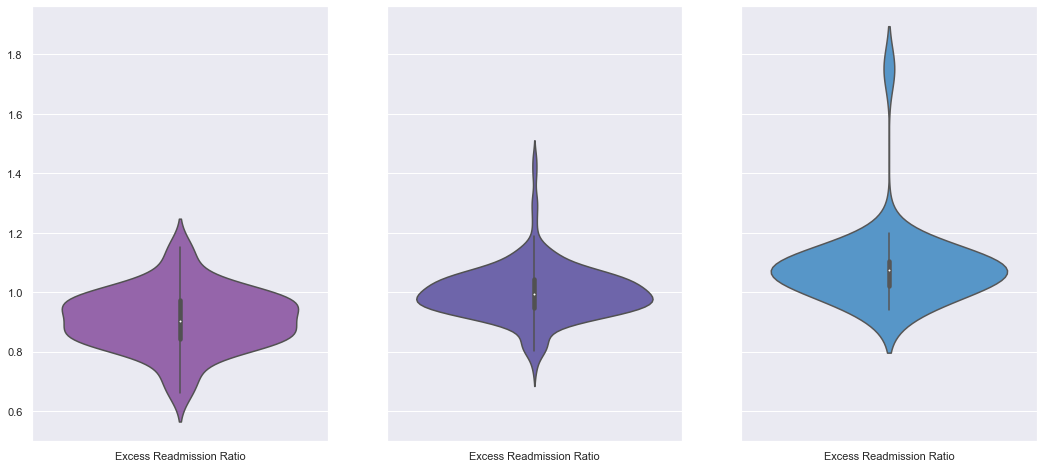

In [91]:
sd = clean_hospital_read_df[clean_hospital_read_df['State'] == 'SD']
sd = sd[['Excess Readmission Ratio']]
az = clean_hospital_read_df[clean_hospital_read_df['State'] == 'AZ']
az = az[['Excess Readmission Ratio']]
dc = clean_hospital_read_df[clean_hospital_read_df['State'] == 'DC']
dc = dc[['Excess Readmission Ratio']]

fig, axs = plt.subplots(ncols=3, sharey=True)
sns.violinplot(data=sd, ax=axs[0], color='#9959b6')
sns.violinplot(data=az, ax=axs[1], color='#6659b6')
sns.violinplot(data=dc, ax=axs[2], color='#4498db')

## The difference between states is much more prounounced than that found in facility size. Thus, there is merit in looks at differing behaviors in healthcare facilities in these states and ideally implement the most effective procedures across the entire nation